In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("50_Startups.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
df["State"].unique() ## to get strings I should change into numbers for better data analysis

array(['New York', 'California', 'Florida'], dtype=object)

In [14]:
X = df.iloc[:,:-1].values ## cleaning data for X
Y = df.iloc[:,-1].values ## cleaning data for Y

In [15]:
X.shape

(50, 4)

In [16]:
Y.shape

(50,)

### changing strings into integers:

1st method is mapping

2nd method is as follows:

Using One Hot Encoder Matrix.

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')

In [19]:
X = np.array(ct.fit_transform(X))

In [20]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [3])])

In [21]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [25]:
# now creating plots for trained data and test rest of data:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
# now create the linear regression model:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, Y_train) ## iterate the best slope for the training data

LinearRegression()

In [28]:
Y_pred = model.predict(X_test)
np.set_printoptions(precision = 2)

In [29]:
Y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [30]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

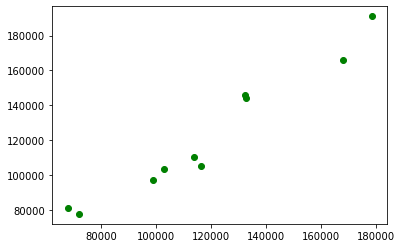

In [31]:
plt.scatter(Y_pred, Y_test, color = "green")


In [36]:
model.intercept_

42467.529248549545

In [40]:
from sklearn.metrics import r2_score ,mean_squared_error

In [41]:
r2_score(Y_test,Y_pred) ## acc

0.9347068473282218

In [43]:
mean_squared_error(y_true=Y_test,y_pred=Y_pred)

83502864.03260383

# Ploynomyal Reg

In [112]:
df=pd.read_csv('Position_Salaries.csv')

In [113]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [114]:
X=df.iloc[:,1:-1]

y=df.iloc[:,-1]


In [120]:
model=LinearRegression()

model.fit(X,y)

LinearRegression()

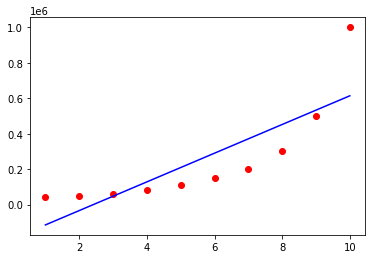

In [123]:
plt.scatter(X,y,color='r')
plt.plot(X,model.predict(X),color='b')

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [130]:
poly_model=PolynomialFeatures(degree=6)

x_poly=poly_model.fit_transform(X)


model=LinearRegression()

model.fit(x_poly,y)

LinearRegression()

In [ ]:
df.drop('Drop timestamp',axis=1,inplace=True)

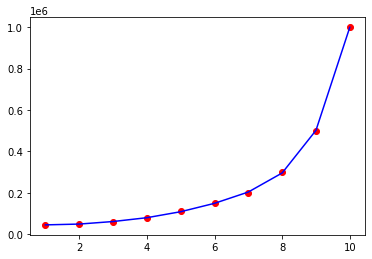

In [131]:
plt.scatter(X,y,color='r')
plt.plot(X,model.predict(x_poly),color='b')